# Midterm I - Least Squares and Regularization

In this problem, we will investigate how to recover a noisy, blurred bar-code using least-squares approach.
In the UPC barcode system (see http://en.wikipedia.org/wiki/Universal_Product_Code), 12 digits are encoded using a series of 59 alternating black and white bars of varying width.  
Each bar may be black (b) or white (w), and has one of four widths: either 1,2,3, or 4 units wide. Each of the 12 digits is encoded with four bars (two white, two black); the width of the bars differ, but the sum of the widths of all four bars is always 7, such that all UPC codes are 95 units wide. Here's the encoding:

| Colors        | Number of bars             | Description   |
| ------------- | -------------------------- | ------------- |
| bwb           | three bars of width 1      | start code    |
| wbwb          | four bars of total width 7 | first digit   |
| wbwb          | four bars of total width 7 | second digit  |
| wbwb          | four bars of total width 7 | third digit   |
| wbwb          | four bars of total width 7 | fourth digit  |
| wbwb          | four bars of total width 7 | fifth digit   |
| wbwb          | four bars of total width 7 | sixth digit   |
| wbwbw         | five bars of width 1       | middle code   |
| bwbw          | four bars of total width 7 | seventh digit |
| bwbw          | four bars of total width 7 | eigth digit   |
| bwbw          | four bars of total width 7 | ninth digit   |
| bwbw          | four bars of total width 7 | tenth digit   |
| bwbw          | four bars of total width 7 | eleventh digit|
| bwbw          | four bars of total width 7 | twelfth digit |
| bwb           | three bars of width 1      | end code      |

Each digit (0-9) corresponds to two particular patterns of bar widths for reasons beyond our interest:

| Digit         |     0      |     1      |     2      |     3      |     4      |     5      |     6      |     7      |     8      |     9      |
| ------------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| Pattern 1     |  3-2-1-1   |  2-2-2-1   |  2-1-2-2   |  1-4-1-1   |  1-1-3-2   |  1-2-3-1   |  1-1-1-4   |   1-3-1-2  |   1-2-1-3  |  3-1-1-2   |
| Pattern 2     |  1-1-2-3   |  1-2-2-2   |  2-2-1-2   |  1-1-4-1   |  2-3-1-1   |  1-3-2-1   |  4-1-1-1   |   2-1-3-1  |   3-1-2-1  |  2-1-1-3   |

For example, if the four bars (left to right) have the pattern 3-2-1-1 or 1-1-2-3, the corresponding UPC digit is 0.

 As an example, you can have a look at the barcode in the main PDF of this midterm problem, and try and decode it. To start you out, here's the code for the first three digits - you can appreciate the difficulty of the task!

| color   | b w b      | w b w b | w b w b | w b w b |
| ------- | ---------- | ------- | ------- | ------- |
| width   | 1 1 1      | 3 2 1 1 | 1 1 3 2 | 3 1 1 2 |
| meaning | start code |    0    |    4    |    9    |

Using his scanner, a cashier takes an image of a barcode, which is represented mathematically as a function f(t) that takes values zero and one: zero corresponds to white bars and one corresponds to black bars. This exact function is shown below:



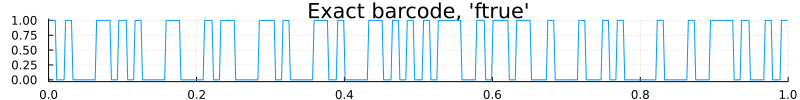

In [3]:
using Plots, LinearAlgebra

#500 ticks
N = 500

code = [1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1]

# making linear spacing with the N (500) points
# and scaling them so they're between 0 and 1
t = collect( ((1:N).-0.5)./N )

# this function takes the decimal x (aka t) values
# that are along the numbers 0 to 1, and it finds which
# of the 95 lines in the bar code that position corresponds
# to. 
# then it uses that number as an index in the "code" variable
# so it picks the correct element in the code array
fexact(t) = (0 < t < 1 ? 1.0*code[floor(Int, 95*t+1)] : 0.0 )


# applying the function to all the t values.
# this is the vertical value of the first graph
ftrue = fexact.(t)

plot(t, ftrue, xlims=(0,1), size=(800,100), title="Exact barcode, 'ftrue'", legend=false)

The optical scanner can only acquire a blurred version of this exact code, sampled at discrete points in a vector, depending on its optical components.  
From this blurred function, it seems difficult to determine the widths of the bars, and hence to interpret the barcode.

We will here assume that we know perfectly these optics, meaning that we can simulate the process perfectly by a known blurring matrix $A$. 

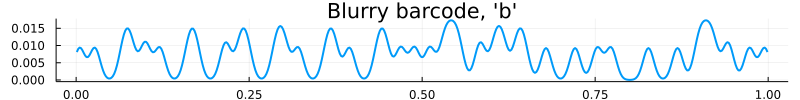

In [5]:
σ = 0.01
A = 1/N*exp.( -((t .- t')./σ).^2 )

# plotted in the second graph
b = A*ftrue

plot(t, b, size=(800,100), title="Blurry barcode, 'b'", linewidth=2, legend=false)

We shall try to improve the situation by solving the inverse problem ${\bf Af} = {\bf b}$ for the vector $\bf f$ that samples the function $f(t)$ at the points $t_k = (k-1/2)/N$ with $N = 500$.  
In addition, we will take into account the fact that results are polluted by noise, which we take here to be 5%, leading to the observations:

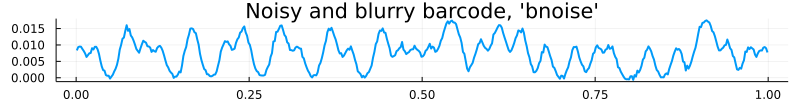

In [7]:
# making some random noise for the third graph.
e = randn(N)

# plotted in the third graph
bnoise = b + .05*norm(b)/norm(e) * e

plot(t, bnoise, size=(800,100), title="Noisy and blurry barcode, 'bnoise'", linewidth=2, legend=false)

### 1. Produce a plot showing the vector $f_{rec}$ obtained by directly solving ${\bf Af} = {\bf b}$.  
Adapt the code above to produce a similar elongated plot. Plot your recovered barcode ${\bf f}_\text{rec}$. Does this resemble ${\bf f}_\text{true}$? Provide an explanation for this phenomenon.

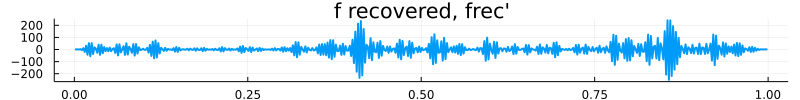

In [35]:
f_rec = A\b
plot(t, f_rec, size=(800,100), title="f recovered, frec'", linewidth=2, legend=false)


This does not resemble the $f_{true}$. I think this is because the matrix A is rank deficient, so it doesn't have an inverse, and backslash doesn't know how to solve for $f_{rec}$

### 2. Repeat part (1), but now using the noisy, blurred vector: solve ${\bf A f_\text{noise}} = {\bf b_\text{noise}}$ for $f_\text{noise}$. 
Plot your recovered barcode ${\bf f}_\text{noise}$. Does this resemble ${\bf f}_\text{true}$? How does it compare to the previous plot?

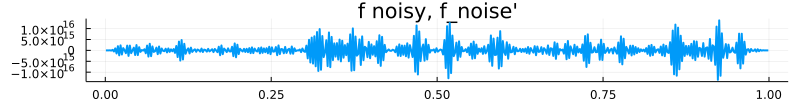

In [36]:
f_noise = A \ bnoise
plot(t, f_noise, size=(800,100), title="f noisy, f_noise'", linewidth=2, legend=false)

Again, this does not resemble the original, and I think that's for the same reason of rank deficiency

### 3. Now let us compute an approximation of ${\bf f}$ using the Singular Value Decomposition.  
Recall that given the dyadic form of the singular value decomposition: $A = \sum_{j=1}^n \sigma_j {\bf u}_j {\bf v}_j^T$, then the rank-$k$ pseudo-inverse of the truncated singular value decomposition writes:
$$
A_k^\dagger = \sum_{j=1}^k \frac{1}{\sigma_j} {\bf v}_j {\bf u}_j^T \qquad \text{and} \qquad {\bf f}_k = A_k^\dagger {\bf b}_\text{noise} =  \sum_{j=1}^k \frac{({\bf u}_j^T {\bf b}_\text{noise})}{\sigma_j} {\bf v}_j.
$$
Write a function taking as arguments $A$, ${\bf b}$ and $k$ computing $A_k^\dagger {\bf b}$, the solution of the least-squares problem $\min_{\bf f} \Vert A_k {\bf f} - {\bf b} \Vert_2^2$.  
Experiment with increasing values of $k$, starting with $k = 50$, $k = 100$, $k = 150$, $k = 200$. Describe how varying $k$ affects the quality of the solution. Do you observe any difference if you use the exact blurred vector ${\bf b}$ versus the noisy, blurred vector ${\bf b}_\text{noise}$? Illustrate your experiments by producing plots like the ones you constructed in parts (1) and (2). Are the recoveries good enough that you can estimate the value of the barcode?

In [26]:
# Complete the following function f_trunc
function f_trunc(A,b,k)
    U,S,V = svd(A)  # U,V are the matrices of the SVD, S is a vector of singular values
    A_dag = sum([1/S[j] * V[:,j] * U[:,j]' for j in 1:k])

    fk = A_dag * b

    return fk
end

f_trunc (generic function with 1 method)

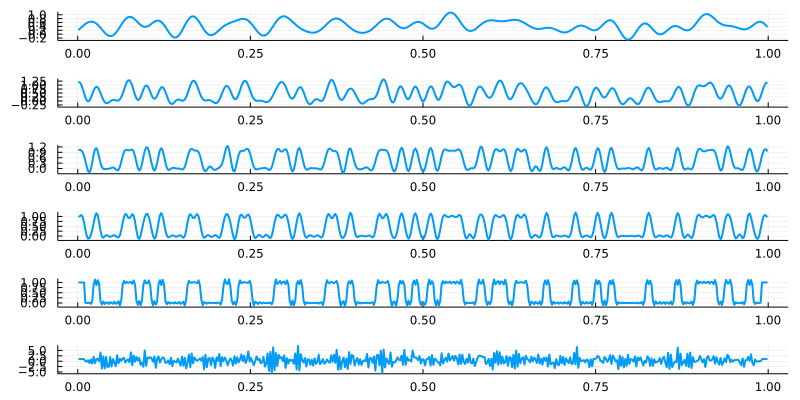

In [42]:
plot(t, [f_trunc(A,b,k) for k = [50,100,150,200,rank(A),480]], size=(800,400), linewidth=2, legend=false, layout=(6,1))

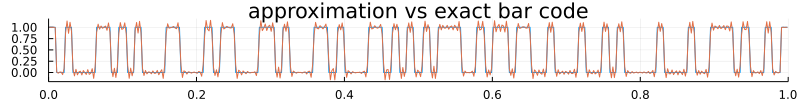

In [48]:
plot(t, [ftrue,f_trunc(A,b,rank(A))], xlims=(0,1), size=(800,100), title="approximation vs exact bar code", legend=false)

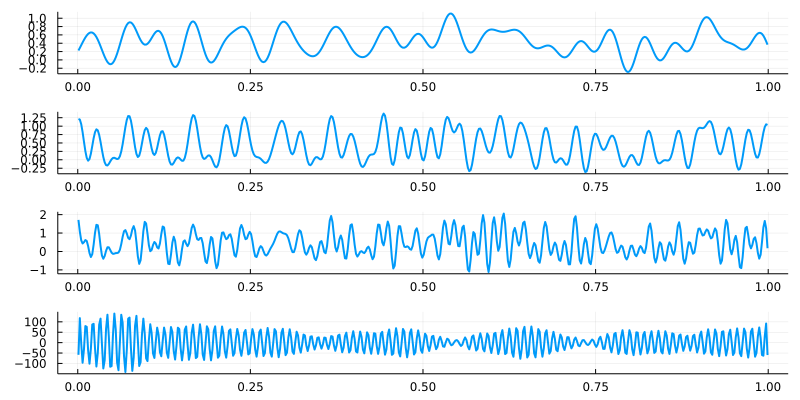

In [28]:
plot(t, [f_trunc(A,bnoise,k) for k = [50,100,150,200]], size=(800,400), linewidth=2, legend=false, layout=(4,1))

The plots from the noisy image are much worse for high rank. I think that's because when we start approximating the noisy image with higher rank matrices, they start picking up the noise, so they are unstable. The plots without the noise are good and I would say monotonically increasing in quality with increasing rank (up to 200).  I went ahead and plotted with an estimation of $rank(A)$ and $480$ (which is almost the size of the matrix), and indeed $rank(A)$ was very good, and the approximation with too many terms got unstable. 

Also, I would say that yes, we can use an approximation for the original barcode. It is clear enough.

### 4. As an alternative to the truncated SVD, let us explore solutions obtained from the regularized least squares problem
$$ 
    \min_{f \in \mathbb{R}^n} \Vert A {\bf f} - {\bf b} \Vert_2^2 + \delta^2 \Vert {\bf f} \Vert^2_2,
$$
for various $\delta$. Recall that we can find the optimal value ${\bf f}_\delta$ by solving the regularized normal equations
$$
    (A^T A + \delta^2 I) {\bf f}_\delta = A^T {\bf b},
$$
or by the alternative formulas seen in Problem 3.

- Write a function allowing to compute the regularized solution ${\bf f}_\delta$.



In [29]:
# Complete the following function f_reg
function f_reg(A,b,delta)
    
    fdelta = (A' * A + delta ^ 2 * I) \ A' * b

    return fdelta
end

f_reg (generic function with 1 method)

- Plot the solution ${\bf f}_\delta$ for $\delta = 5.10^{-6}$, $5.10^{-4}$, $5.10^{-2}$.  
What do you observe as $\delta$ increases? Propose an explanation. Which solution comes closest to ${\bf f}_{true}$?


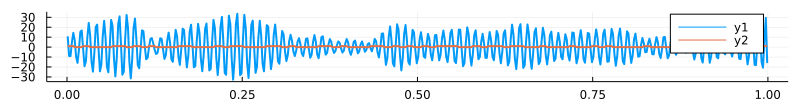

In [30]:
# Compute and plot here the solution f1 for delta = 5*10^-6
delta = 5e-6
f1 = f_reg(A,bnoise,delta)

plot(t, [f1 ftrue], size=(800,100), linewidth=2)

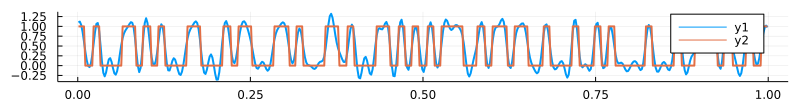

In [31]:
# Compute and plot here the solution f2 for delta = 5*10^-4
delta = 5e-4
f2 = f_reg(A,bnoise,delta)

plot(t, [f2 ftrue], size=(800,100), linewidth=2)

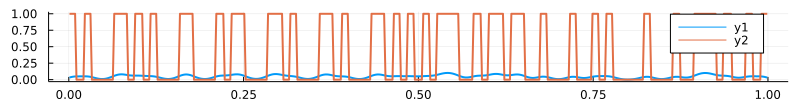

In [32]:
# Compute and plot here the solution f3 for delta = 5*10^-2
delta = 5e-2
f3 = f_reg(A,bnoise,delta)

plot(t, [f3 ftrue], size=(800,100), linewidth=2)

- \[Bonus\] Using the noisy observation ${\bf b}_\text{noise}$ and 100 logarithmically-spaced values of $\delta$ in the range $10^{-6}, \dots, 10^{-1}$, plot the quantity $\Vert {\bf b}_\text{noise} - A {\bf f_\delta} \Vert $ on the horizontal axis and $\Vert f_\delta \Vert$ on the vertical axis.
In addition, we locate the result corresponding to the 3 values above on this so-called L-curve. What do you observe? Propose an explanation and a general method for choosing the right regularization parameter delta.

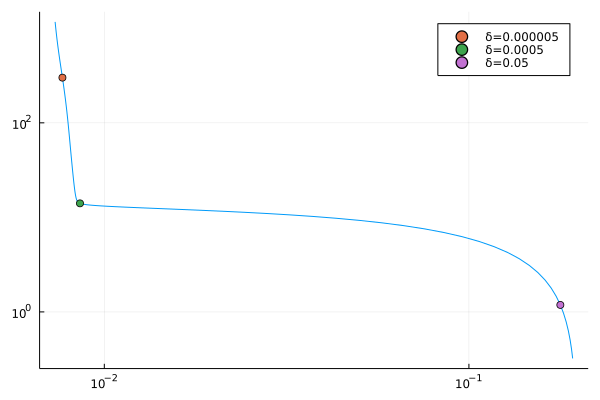

In [34]:
delta = exp10.(range(start=-6, stop=-1, length = 100))
x = zeros(100)
y = zeros(100)

for j=1:100
    f = f_reg(A,bnoise,delta[j])
    
    x[j] = norm(bnoise - A*f)
    y[j] = norm(f)
end

plot(x,y, xscale=:log10, yscale=:log10, label="")
plot!([norm(A*f1 - bnoise) norm(A*f2 - bnoise) norm(A*f3 - bnoise)], [norm(f1) norm(f2) norm(f3)], 
                seriestype=:scatter, label=["δ=0.000005" "δ=0.0005" "δ=0.05"])

The x direction is showing the error between the actual f and the reconstructed f, which we want to be small, and the vertical direction is the magnitude of f, which we also want to be small.  The reason we want the magnitude of f to be small is because we want to avoid overfitting, and we want the error to be small because that is the main goal.  So what happens in this curve is that when $\delta$ is big, the regularization matters a lot, so the vector is small, but the regularization is weighted so heavily that we don't focus enough on fitting the curve, and our error is high. On the other side, our regularization is small, so our error is very heavily weighted, so we have very small error, but there is almost no regularization, so the solution is very big. So the general method is to graph the log-log plot of the magnitude and error and see where the crease in the L is, and use that as the solution.